In [13]:
import cv2
import matplotlib.pyplot as plt


cap = cv2.VideoCapture(0)
frame = cv2.imread('../data/photos/Donald_Trump_mug_shot.jpg')


In [8]:
import mediapipe as mp
import numpy as np
import math

mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

model_points = np.array([
    (0.0, 0.0, 0.0),  # 鼻尖
    (0.0, -330.0, -65.0),  # 下巴
    (-225.0, 170.0, -135.0),  # 左眼左上角
    (225.0, 170.0, -135.0),  # 右眼右上角
    (-150.0, -150.0, -125.0),  # 左嘴角
    (150.0, -150.0, -125.0)  # 右嘴角
], dtype='double')


camera_matrix = np.array([[640, 0, 320],
                          [0, 640, 240],
                          [0, 0, 1]], dtype='double')
dist_coeffs = np.zeros((4, 1))  # 假设没有畸变


with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb_frame)
    if results.multi_face_landmarks:
        for landmarks in results.multi_face_landmarks:
            image_points = []
            for idx in [1, 33, 61, 199, 267, 61]:  # 选取一些典型的面部关键点
                image_points.append([landmarks.landmark[idx].x * frame.shape[1], 
                                        landmarks.landmark[idx].y * frame.shape[0]])
            image_points = np.array(image_points, dtype='double')
            success, rotation_vector, translation_vector = cv2.solvePnP(model_points, image_points, camera_matrix, dist_coeffs)
            rotation_matrix, _ = cv2.Rodrigues(rotation_vector)
            R = rotation_matrix
            sy = math.sqrt(R[0, 0] ** 2 + R[1, 0] ** 2)
            singular = sy < 1e-6  # 处理奇异情况

            if not singular:
                x = math.atan2(R[2, 1], R[2, 2])
                y = math.atan2(-R[2, 0], sy)
                z = math.atan2(R[1, 0], R[0, 0])
            else:
                x = math.atan2(-R[1, 2], R[1, 1])
                y = math.atan2(-R[2, 0], sy)
                z = 0

            # 欧拉角（单位为弧度）
            euler_angles = np.degrees([x, y, z])  # 转为度数
            print(f"欧拉角 (X, Y, Z): {euler_angles}")
            p_int = (int(p[0]), int(p[1]))
            for p in image_points:
                    cv2.circle(frame, p_int, 2, (0, 0, 255), -1)



欧拉角 (X, Y, Z): [ -80.0119974   -69.36372433 -107.14936705]


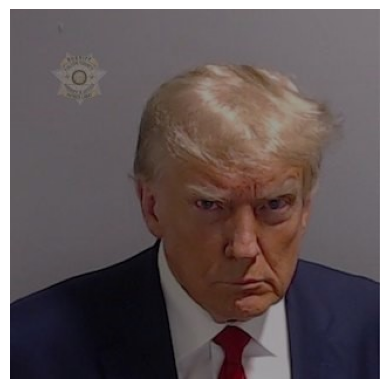

In [14]:
image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# 使用 Matplotlib 显示图像
plt.imshow(image_rgb)
plt.axis('off')  # 不显示坐标轴
plt.show()

In [15]:
def calculate_luminance(image):
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    luminance = np.mean(gray_img)
    return luminance

calculate_luminance(frame)

80.06317096619132

In [18]:
frame = cv2.imread('../data/photos/mosaic.jpg')
def calculate_sharpness(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)  # 计算拉普拉斯变换
    sharpness = laplacian.var()  # 计算拉普拉斯变换结果的方差
    return sharpness

calculate_sharpness(frame)

2373.9013525163323

In [26]:
a = np.array([[[1, 2], [1, 2]], [[1, 2], [1, 2]]])
a[0:1, 0:1].shape

(1, 1, 2)